<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/01-Regress%C3%A3o/Regress%C3%A3o_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regressão Linear

## O que é Regressão Linear?

A **Regressão Linear** é um método estatístico usado para modelar a relação entre uma variável dependente (Y) e uma ou mais variáveis independentes (X). É amplamente utilizada em diversas áreas, principalmente em negócios, para previsão e inferência.

## Exemplos na Área de Negócios

1. **Previsão de Vendas**: Empresas utilizam regressão linear para estimar vendas futuras com base em variáveis como gastos com publicidade, preço do produto e condições econômicas.
2. **Análise de Risco de Crédito**: Bancos aplicam modelos de regressão linear para avaliar a probabilidade de inadimplência de clientes, considerando fatores como histórico de crédito e renda.

## Gráfico de Dispersão

Um **gráfico de dispersão** é usado para visualizar a relação entre as variáveis. Por exemplo, ao plotar gastos com publicidade (X) contra vendas (Y), um padrão linear sugere uma relação positiva: quanto mais se gasta em publicidade, mais se vende.

```python
import matplotlib.pyplot as plt

# Exemplo de dados
x = [1, 2, 3, 4, 5] # Gastos com publicidade
y = [2, 4, 5, 4, 5] # Vendas

plt.scatter(x, y)
plt.xlabel('Gastos com Publicidade')
plt.ylabel('Vendas')
plt.title('Gráfico de Dispersão entre Publicidade e Vendas')
plt.show()
```
## Conceitos de Valor-P e R2

- **Valor-P**: Indica a probabilidade de que os resultados do seu modelo sejam devidos ao acaso. Um valor-P baixo (geralmente menor que 0,05) sugere que a variável independente tem um efeito significativo sobre a variável dependente.

- **R²** (Coeficiente de Determinação): Mede o quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, onde um R² mais próximo de 1 indica que o modelo explica uma grande parte da variabilidade dos dados.


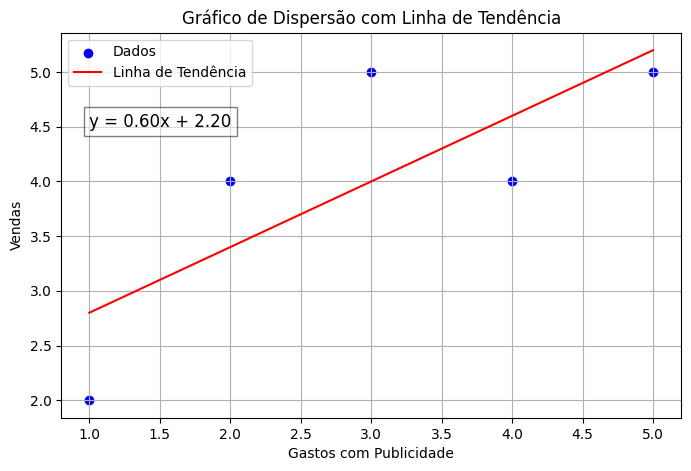

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dados fornecidos
x = [1, 2, 3, 4, 5]  # Gastos com publicidade
y = [2, 4, 5, 4, 5]  # Vendas

# Calculando a linha de tendência
coeficientes = np.polyfit(x, y, 1)
linha_tendencia = np.polyval(coeficientes, x)

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, linha_tendencia, color='red', label='Linha de Tendência')

# Adicionando a equação linear ao gráfico
equacao = f"y = {coeficientes[0]:.2f}x + {coeficientes[1]:.2f}"
plt.text(1, 4.5, equacao, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adicionando títulos e legendas
plt.title('Gráfico de Dispersão com Linha de Tendência')
plt.xlabel('Gastos com Publicidade')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()



In [5]:
import statsmodels.api as sm

# Convertendo x para uma matriz 2D (necessário para statsmodels)
X = sm.add_constant(np.array(x).reshape(-1, 1))

# Criando e ajustando o modelo
modelo = sm.OLS(y, X).fit()

# Exibindo o sumário dos resultados
sumario = modelo.summary()
print(sumario)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.124
Time:                        14:14:52   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [3]:
import pandas as pd

# Dados fornecidos
x = [1, 2, 3, 4, 5]  # Gastos com publicidade
y = [2, 4, 5, 4, 5]  # Vendas

# Criando o DataFrame
df = pd.DataFrame({'Gastos com Publicidade': x, 'Vendas': y})
df


,Gastos com Publicidade,Vendas
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


from matplotlib import pyplot as plt
df['Gastos com Publicidade'].plot(kind='hist', bins=20, title='Gastos com Publicidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Vendas'].plot(kind='hist', bins=20, title='Vendas')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Gastos com Publicidade', y='Vendas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Gastos com Publicidade']
  ys = series['Vendas']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Gastos com Publicidade', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gastos com Publicidade')
_ = plt.ylabel('Vendas')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Gastos com Publicidade']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Gastos com Publicidade'}, axis=1)
              .sort_values('Gastos com Publicidade', ascending=True))
  xs = counted['Gastos com Publicidade']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Gastos com Publicidade', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Gastos com Publicidade')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Gastos com Publicidade'].plot(kind='line', figsize=(8, 4), title='Gastos com Publicidade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Vendas'].plot(kind='line', figsize=(8, 4), title='Vendas')
plt.gca().spines[['top', 'right']].set_visible(False)

- Vendas = 2.20 + (0.60xPropaganda (reta))
- Propaganda = 6
- Vendas = 2.20 + 0.60*6 = 5.80

In [2]:
2.20+0.60*6

5.8

In [8]:
import pandas as pd

#Leitura do Banco de Dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/01-Regress%C3%A3o/custos.xlsx')

nome_y = "Custo"
y = dados[nome_y]
X = dados.drop(nome_y, axis =1)



0     230001
1     221034
2     240423
3     185955
4     218055
5     263025
6     235350
7     211902
8     190251
9     168171
10    202338
11    216306
12    205599
13    207237
14    256650
15    174591
16    184878
17    242067
18    174768
19    166011
20    255324
21    229455
22    203349
23    169194
24    199866
25    190482
26    268248
27    202554
28    221040
29    198396
Name: Custo, dtype: int64

In [15]:
import pandas as pd
import statsmodels.api as sm

# Leitura do Banco de Dados
url = 'https://github.com/daniel-usp/MachineLearning/raw/main/01-Regress%C3%A3o/custos.xlsx'
dados = pd.read_excel(url)

nome_y = "Custo"
y = dados[nome_y]
X = dados.drop([nome_y, "Sazonalidade"], axis=1)

# Adicionando a constante ao modelo
X = sm.add_constant(X)

# Criando e ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibindo o sumário dos resultados
sumario = modelo.summary()
print(sumario)




                            OLS Regression Results                            
Dep. Variable:                  Custo   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.03e-18
Time:                        14:37:25   Log-Likelihood:                -305.04
No. Observations:                  30   AIC:                             616.1
Df Residuals:                      27   BIC:                             620.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.489e+04   7854.543      4.442      0.0

 Esse alto valor de R² indica que 95% da variabilidade no "Custo" pode ser explicada pelas variáveis "Embalagens" e "Toneladas de Cacau". Em outras palavras, quase toda a variação nos custos é atribuível às variações nessas duas variáveis independentes.

 Custo = 34.893 + 57.34xEmbalagens + 986.95xToneladas

In [16]:
# Extrair a tabela de resultados
resultados = sumario.tables[1].data

# Identificar variáveis com valor-p acima de 0.05
variaveis_nao_significativas = []
for linha in resultados[1:]:  # Ignorar a primeira linha que é o cabeçalho
    nome_variavel = linha[0]
    valor_p = float(linha[4])
    if valor_p > 0.05:
        variaveis_nao_significativas.append(nome_variavel)

print(variaveis_nao_significativas)

[]


In [20]:
import statsmodels.api as sm
import pandas as pd

# Supondo que você tenha o modelo ajustado 'modelo'
# e que você tenha os novos dados para previsão
novos_dados = pd.DataFrame({
    'Embalagens': [2000, 2500, 3000],
    'Toneladas': [20, 22, 30]
})

# Adicionando a constante aos novos dados, como foi feito no modelo original
novos_dados = sm.add_constant(novos_dados)

# Fazendo as previsões
previsoes = modelo.predict(novos_dados)

# Arredondando as previsões para duas casas decimais
previsoes_arredondadas = previsoes.round(2)

# Exibindo as previsões arredondadas
print(previsoes_arredondadas)

# Criando um DataFrame para salvar no Excel
resultado = pd.DataFrame({
    'Embalagens': novos_dados['Embalagens'],
    'Toneladas': novos_dados['Toneladas'],
    'Previsao_Custo': previsoes_arredondadas
})

# Salvando o DataFrame em um arquivo Excel
caminho_arquivo = 'Previsoes_Custo.xlsx'
resultado.to_excel(caminho_arquivo, index=False)



0    169312.54
1    199956.53
2    236522.24
dtype: float64
